Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 04: Segmentation and Color

## Introduction


This week's sheet should be solved and handed in before the end of **Tuesday, November 30, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

YOUR ANSWER HERE

**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

YOUR ANSWER HERE

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

## Assignment 1: Histogram-based segmentation [5 Points]

### a) Histogram-based segmentation

What is histogram-based segmentation? What are it's goals, benefits, and problems?

Histogram based segmentation is a binary segmentation by finding a suitable threshold based on the distribution of the gray values. As a binary segmentation it is usually used to separate background and foreground, and - if it works for an image, it is an easy and quick segmentation method. However, it only really works if the distribution of gray values is bimodal and can therefore be separated easily and meaningfully, if the gray values are distributed differently, the segmentation will likely not be meaningful. This problem can be caused by uneven lighting, where the shading destroys the otherwise bimodal distribution, but this can be alleviated by computing a shading image or by locally varying the thresholds for segmentation.

### b) Threshold computation

There exist different methods to automatically determine a threshold for an image. Find at least two that are provided by scikit-image and describe them in more detail. Then apply them to the images `schrift.png` and `pebbles.jpg`.

threshold_minimum: The threshold is computed by computing the histogram, smoothing it with a uniform filter, finding all local maxima in the smoothed histogram, and repeating the last two steps until only two maxima are found (or stopping if this process is taking too long). Then the minumum between the found maxima is computed and returned as threshold.

threshold_otsu: Otsu's method, in the simplest form, returns a single intensity threshold that separate pixels into two classes, foreground and background. This threshold is determined by minimizing intra-class intensity variance, or equivalently, by maximizing inter-class variance. It is exhaustively searched for the threshold that minimizes the intra-class variance, defined as a weighted sum of variances of the two classes. Finally, the desired threshold corresponds to the maximum.

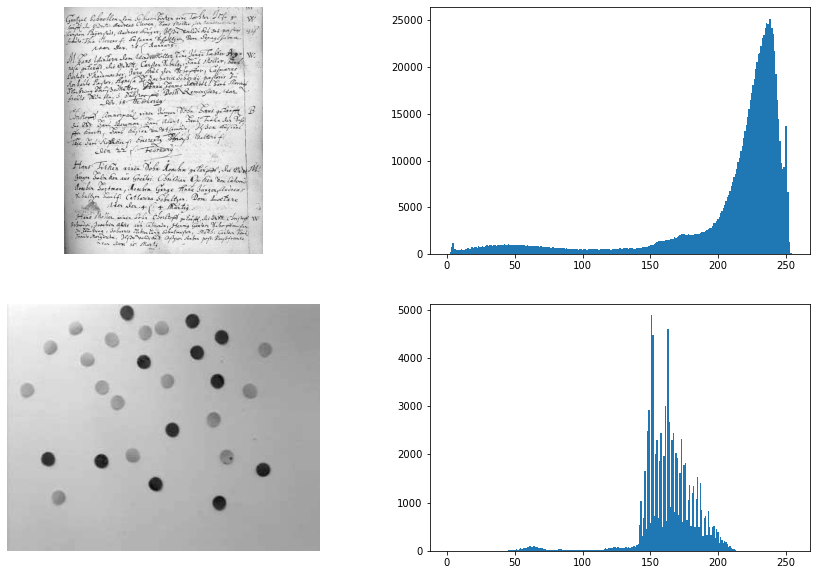

In [1]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt
from imageio import imread

img1 = imread('images/schrift.png')
img2 = imread('images/pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

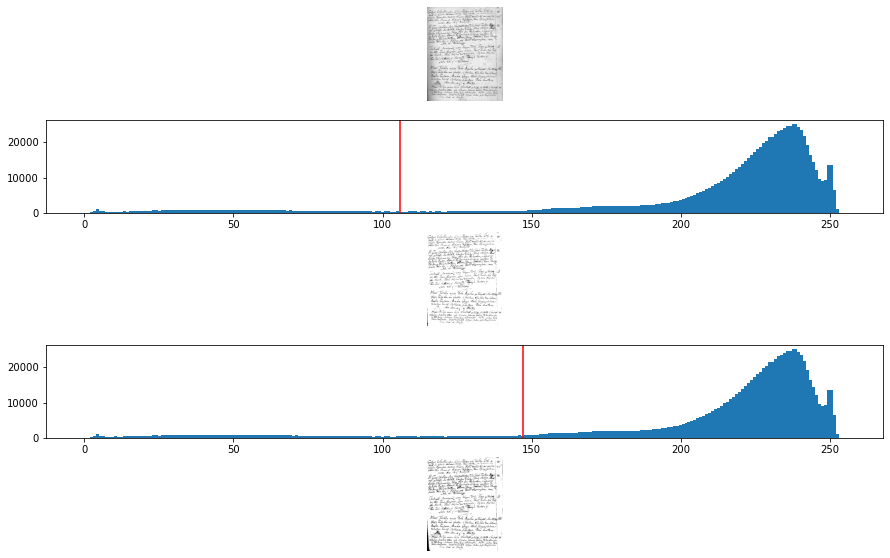

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from imageio import imread
from skimage.filters import try_all_threshold, threshold_minimum, threshold_otsu

#img = imread('images/pebbles.jpg') # 'pebbles.jpg' or 'schrift.png'
img = imread('images/schrift.png')
# YOUR CODE HERE
#img = try_all_threshold(img)
thresh = threshold_minimum(img)
thresh1 = threshold_otsu(img)
segments = img > thresh
segments1 = img > thresh1


plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(5,1,1); plt.axis('off'); plt.imshow(img)
plt.subplot(5,1,2); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh, color='r')
plt.subplot(5,1,3); plt.axis('off'); plt.imshow(segments)
plt.subplot(5,1,4); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh1, color='r')
plt.subplot(5,1,5); plt.axis('off'); plt.imshow(segments1)
plt.show()

### c) Shading

Shading may cause a problem to histogram based segmentation. In the lecture (CV-07 slide 13), it was proposed to compute a shading image to deal with that problem. Apply this approach to the images `schrift.png` and `pebbles.jpg`. You may use filter functions from scikit-image for this exercise.

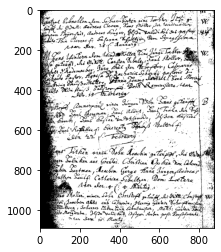

/home/hannah/anaconda3/envs/cv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


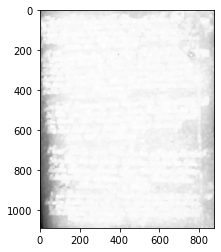

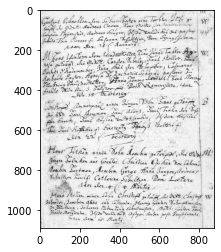

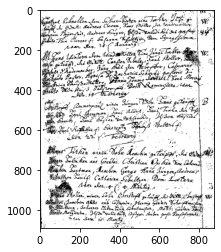

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import skimage.morphology as morph
from skimage.filters.rank import maximum
from skimage.filters import threshold_triangle
#import scipy.ndimage.maximum_filter

img = imread('images/schrift.png').astype(float)/255
#img = imread('images/pebbles.jpg').astype(float)/255

# YOUR CODE HERE
thresh = threshold_triangle(img)
segments = img > thresh
plt.imshow(segments)
plt.show()

h = maximum(img, morph.square(13))
plt.imshow(h)
plt.show()

img = img * (1/h)
img *= (255.0 / img.max())

plt.imshow(img)
plt.show()

thresh = threshold_triangle(img)
segments = img > thresh

plt.imshow(segments)
plt.show()

## Assignment 2: Pyramid representation [5 Points]

**a)** What is the *Gaussian pyramid*? How does the **reduce** operation work? Explain in your own words what low pass filtering is and why it should be used when building the pyramid? Implement the **reduce** operation and generate a figure similar to the one on (CV-07 slide 32).

The Gaussian pyramid is an explicit multiscale representation where an image is stored in multiple scales with each smaller image being one fourth the size of the previous one, so that the whole pyramid only requires 4/3 of the space of the original image.  
The reduce operation is used to scale the input image, so that one pixel on the new (smaller) level of the pyramid replaces four pixels of the previous level.
Low-pass filtering removes noise (high frequencies) by basically averaging them out, so that artifacts which can arise from them when building the pyramid can be avoided.

/tmp/ipykernel_16646/1451614521.py:6: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


<Figure size 432x288 with 0 Axes>

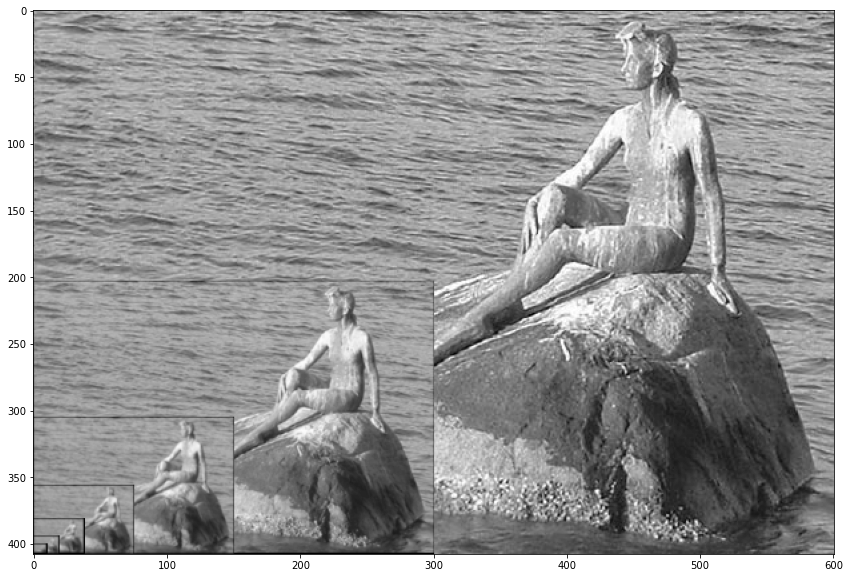

In [4]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread
from mpl_toolkits.axes_grid.inset_locator import inset_axes

img = imread('images/mermaid.png')

pyramid_image = img.copy() # change this!


# YOUR CODE HERE
def reduce(img):
    # create array for output image
    result = np.zeros((int(img.shape[0]/2+1),int(img.shape[1]/2+1)))
    tmp = np.zeros((int(img.shape[0]+4),int(img.shape[1]+4)))
    tmp[2:-2, 2:-2]=img
    
    for n, line in enumerate(np.arange(img.shape[0])[::2]):
        frac = 1/256
        line = line+2
        
        for i,x in enumerate(np.arange(img.shape[1])[::2]):
            x = x+2
            result[n, i] = frac*(1*tmp[line-2, x-2]+4*tmp[line-2, x-1]+6*tmp[line-2, x]+4*tmp[line-2, x+1]+1*tmp[line-2, x+2]+
                                    4*tmp[line-1, x-2]+16*tmp[line-1, x-1]+24*tmp[line-1, x]+16*tmp[line-1, x+1]+4*tmp[line-1, x+2]+
                                    6*tmp[line, x-2]+24*tmp[line, x-1]+36*tmp[line, x]+24*tmp[line, x+1]+6*tmp[line, x+2]+
                                    4*tmp[line+1, x-2]+16*tmp[line+1, x-1]+24*tmp[line+1, x]+16*tmp[line+1, x+1]+4*tmp[line+1, x+2]+
                                    1*tmp[line+2, x-2]+4*tmp[line+2, x-1]+6*tmp[line+2, x]+4*tmp[line+2, x+1]+1*tmp[line+2, x+2])
    
 
    
    return result       

reduced = img.copy()
plt.gray()

while reduced.shape[0]>10:
    reduced = reduce(reduced)
    pyramid_image[pyramid_image.shape[0]-reduced.shape[0]:, :reduced.shape[1]] = reduced

plt.figure(figsize=(15,10))
plt.imshow(pyramid_image)

plt.show()

**b)** What is the **expand** operation? Why can the **reduce** operation not be inverted? Implement the **expand** operation and generate an image similar to the one on (CV-07 slide 34).

The expand operation is the opposite of the reduce operation in that the image that is scaled by it is expanded, so a lower (larger) level in the pyramid is recreated from the level above. The additional pixels are generated by interpolation, with the interpolation factors depending on the filtering used, and with different interpolation factors for pixel locations that exist on both levels that for those that exist only on the higher level.  
Expand only yields a blurred image, as the reduce operation can not be inverted because when reducing you are summarizing 4 pixels to one, which is possible. However, you cannot form 1 pixel to 4 different ones. Therefore, pixels of a certain level are generated by interpolation. Some pixels exist on both scaling levels (1/8), whereas some pixel exist only on level i+1 (1/7).

<Figure size 432x288 with 0 Axes>

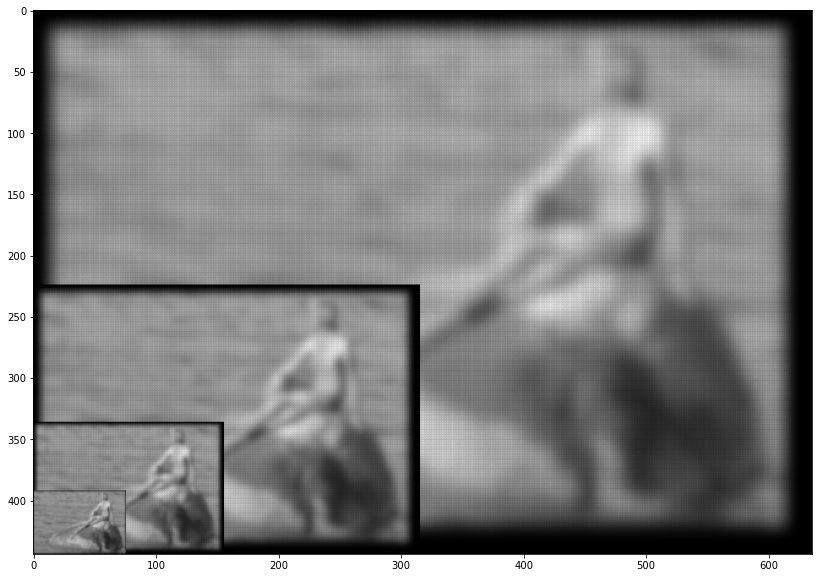

In [5]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from imageio import imread

img = imread('images/mermaid.png')


steps = 4
#pyramid_image = np.zeros((img.shape[0] + (2 ** steps), img.shape[1] + (2 ** steps)))
# YOUR CODE HERE
def expand(img):
    # create array for output image
    tmp = np.zeros((int(img.shape[0]*2+4),int(img.shape[1]*2+4)))
    
    for line, n in enumerate(img):
        frac = 1/256
        line = 2*line+2
        
        for x,i in enumerate(n):
            x = 2*x+2
            
            tmp[line-2, x-2] += 1*frac*i
            tmp[line-2, x-1] += 4*frac*i
            tmp[line-2, x] += 6*frac*i
            tmp[line-2, x+1] += 4*frac*i
            tmp[line-2, x+2] += 1*frac*i
            tmp[line-1, x-2] += frac*i*4
            tmp[line-1, x-1] += frac*i*16
            tmp[line-1, x] += frac*i*32
            tmp[line-1, x+1] += frac*i*16
            tmp[line-1, x+2] += frac*i*4
            tmp[line, x-2] += frac*i*6
            tmp[line, x-1] += frac*i*24
            tmp[line, x] += frac*i*36
            tmp[line, x+1] += frac*i*24
            tmp[line, x+2] += frac*i*6
            tmp[line+1, x-2] += frac*i*4
            tmp[line+1, x-1] += frac*i*16
            tmp[line+1, x] += frac*i*24
            tmp[line+1, x+1] += frac*i*16
            tmp[line+1, x+2] += frac*i*4
            tmp[line+2, x-2] += frac*i*1
            tmp[line+2, x-1] += frac*i*4
            tmp[line+2, x] += frac*i*6
            tmp[line+2, x+1] += frac*i*4
            tmp[line+2, x+2] += frac*i*1
  
    return tmp       


reduced = img.copy()
plt.gray()

pyramid_image = img.copy()
for i in range(steps-1):
    reduced = reduce(reduced)
    pyramid_image[pyramid_image.shape[0]-reduced.shape[0]:, :reduced.shape[1]] = reduced


pyramid_image=reduced
tmp = pyramid_image
for i in range(steps-1):
    pyramid_image = expand(pyramid_image)*4
    pyramid_image[pyramid_image.shape[0]-tmp.shape[0]:, :tmp.shape[1]] = tmp
    tmp = pyramid_image


plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

## Assignment 3: Texture Segmentation [5 Points]

**a)** What is texture? Try to define it in your own words. Can there be a standard definition? What problems do you expect for texture based segmentation? 

Own definition: Tactile texture refers to the tangible feel of a surface and visual texture refers to see the shape or contents of the image. In the image processing, the texture can be defined as a function of spatial variation of the brightness intensity of the pixels.  
  
There is no standard definition and it is likely impossible that there can be one, as people have different opinions on which properties are important to define texture and it also depends on the application.  
Texture based segmentation might have problems with textures appearing in different angles, having slight variations, and that a same background or object could have more than one texture and thus not be favorable to differing between objects.

**b)** What is a co-occurence matrix? How can it be used to characterize texture?

A co-occurrence matrix or co-occurrence distribution is a matrix that is defined over an image to be the distribution of co-occurring pixel values (grayscale values, or colors) at a given offset. It is used as an approach to texture analysis with various applications especially in medical image analysis. The co-occurence matrix descibes how often two values co-occur as a pair of pixels for a given angle and distance between those pixels. The co-occurrence matrix is still containing an abundance of information, given the amount of gray/color values. Therefore texture features are extracted from the co-occurrence matrix.  
Different textures likely exhibit different co-occurence matrices while the image patches with the same texture will have very similar co-occurence matrices.


**c)** Implement a function to compute the co-occurence matrix of an image (patch). Apply it and compare your results to (CV-07 slide 54).

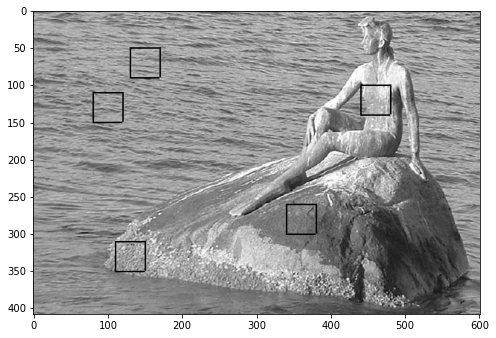

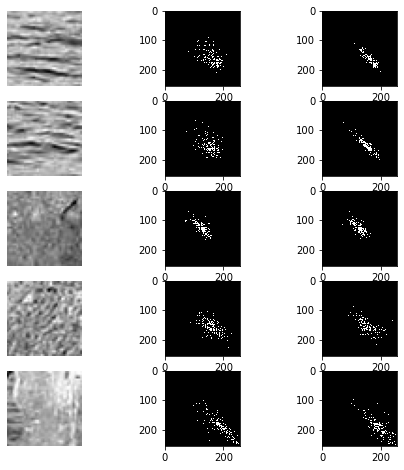

In [6]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio 

img = imageio.imread('images/mermaid.png')#, mode='L')

def get_patch(img, x, y, size=40):
    """
    Extract a rectangular patch from an image and mark it in the original image.
    
    Args:
        img (nndarray): Input image.
        x (uint): X-coordinate.
        y (uint): Y-coordinate.
        size (uint): Size of the patch.
        
    Returns:
        result: The extracted patch.
    """
    result = img[x:x+size,y:y+size].copy()
    img[x:x+size, [y,y+1,y+size,y+size+1]] = 0
    img[[x,x+1,x+size,x+size+1], y:y+size] = 0
    return result

patches = []
patches.append(get_patch(img, 50,130))
patches.append(get_patch(img, 110,80))
patches.append(get_patch(img, 260,340))
patches.append(get_patch(img, 310,110))
patches.append(get_patch(img, 100,440))


def cooccurrence(img, dx=1, dy=1):
    """
    Compute a co-occurence matrix for the given image.
    
    Args:
        img          the grayscale image (uint8)
        dx,dy        the offset between the two reference points

    Returns:
        matrix       the co-occurence matrix
    """
    matrix = np.empty((256, 256))
    # YOUR CODE HERE 
    
    p1 = img[dy:, :-dx]
    p2 = img[:-dy, dx:]


    if dx == 0:
        p1 = img[dy:, dx:]
    if dy == 0:
        p2 = img[dy:, dx:]
    if dx == 0 and dy == 0:
        p2 = p1
    if dx<0 or dy<0:
        tmp = p1
        p1=p2
        p2 = tmp

    for v1 in range(matrix.shape[0]):
        for v2 in range(matrix.shape[1]):
            matrix[v1,v2]=np.sum(p2[np.where(p1==v1)] == v2)
        
    
    return matrix


plt.figure(figsize=(8, 8))
plt.gray()
plt.imshow(img)
plt.show()


plt.figure(figsize=(8, 8))
i = 0

for p in patches:
    plt.subplot(len(patches),3,i+1); plt.axis('off'); plt.imshow(p)
    # For visualization one may apply some extra me, e.g., logarithmization or binarization
    plt.subplot(len(patches),3,i+2); plt.imshow(cooccurrence(p, 0, 1)>0, interpolation='none')
    plt.subplot(len(patches),3,i+3); plt.imshow(cooccurrence(p,1,0)>0, interpolation='none')
    i += 3
plt.show()

## Assignment 4: Region merging [5 Points]

Implement the *region merging* algorithm (CV-07 slide 39) and apply it to the image `segments.png` (or some part of it). Use a simple *homogeneity condition*, e.g. that the maximal difference between gray values in a segment is not larger than a given threshold.

img shape (64, 64) 4096
number of merges to complete 2467
number of merges to complete 2467
merges completed  2467


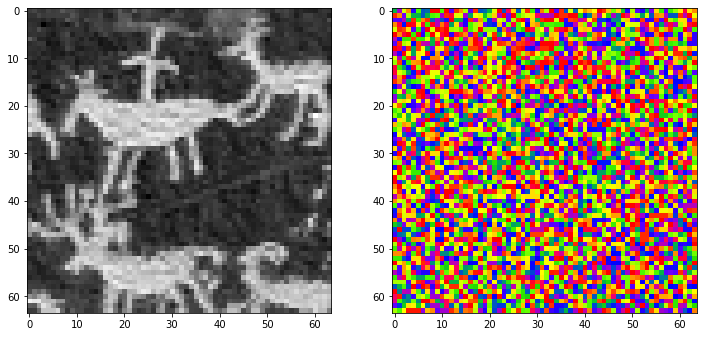

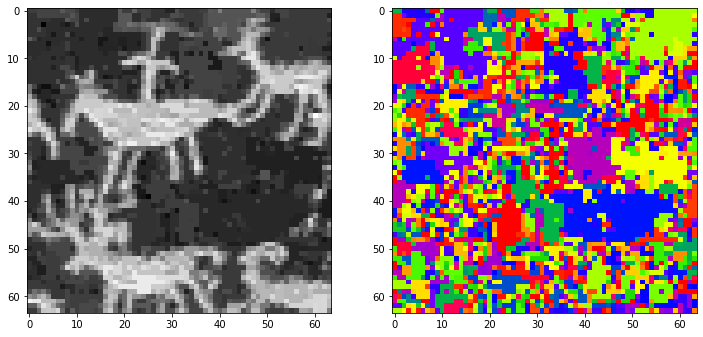

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import warnings

class Region:
    def __init__(self, x, y, value):        
        self.value = value
        self.xs = [x]
        self.ys = [y]
        
        
    def apply_value(self, array):
        array[self.xs, self.ys]=self.value
        
    def merge(self, other, array):
        #print("before merge:",self.xs, self.ys)
        self.xs.extend(other.get_xs())
        self.ys.extend(other.get_ys())
        #print("after merge:",self.xs, self.ys)
        self.apply_value(array)
        return self.xs, self.ys
        
    def to_array(self, array_shape):
        a = np.zeros(array_shape)
        a[self.xs, self.ys] = self.value
        return a
        
    def get_xs(self):
        return self.xs
    def get_ys(self):
        return self.ys

img = imageio.imread('./images/segments.png', pilmode='L')
# Choosing a large image region lengthens computation time
img = img[64:128,64:128]

# compute the `label` array by implementing "region merging"
# YOUR CODE HERE


def region_merge(img, thresh=5):
    label = img.copy().astype('int64')

    # array with references to regions
    regions = np.empty(label.shape, dtype=Region)
    for row in range(regions.shape[0]):
        for x in range(regions.shape[1]):
            regions[row, x] = Region(x=row, y=x, value=label[row, x])

    # get all edges - edges inside regions are 0, so exclude those   
    h = np.abs(label[:,:-1] - label[:,1:])
    v = np.abs(label[:-1,:] - label[1:,:])
    merges = 0
    to_merge = np.sum(h[h<thresh]>0)+np.sum(v[v<thresh]>0)
    print("number of merges to complete", to_merge)
    while True:


        if(len(h[h>0])>0 and np.min(h[h>0]) < thresh or len(v[v>0])>0 and np.min(v[v>0]) < thresh):
            did_merge = False

            if len(h[h>0])>0 and (not len(v[v>0])>0 or np.min(h[h>0]) < np.min(v[v>0])):           
                ls = np.where(h == np.min(h[h>0]))

                for i in range(len(ls[0])):
                    h[ls[0][i],ls[1][i]]=0
                    #print("merging region",regions[ls[0][i], ls[1][i]]," at", ls[0][i], ls[1][i], " with region ", regions[ls[0][i], ls[1][i]+1], "at", ls[0][i], ls[1][i]+1)
                    xs, ys = regions[ls[0][i], ls[1][i]].merge(regions[ls[0][i], ls[1][i]+1], label)
                    regions[xs, ys] = regions[ls[0][i], ls[1][i]]
                    did_merge=True
                    merges +=1
                    break
                

            if not did_merge:
                ls = np.where(v == np.min(v[v>0]))  

                for i in range(len(ls[0])):
                    v[ls[0][i],ls[1][i]]=0
                    #print("merging region",regions[ls[0][i], ls[1][i]]," at", ls[0][i], ls[1][i], " with region ", regions[ls[0][i]+1, ls[1][i]], "at", ls[0][i]+1, ls[1][i])
                    xs, ys = regions[ls[0][i], ls[1][i]].merge(regions[ls[0][i]+1, ls[1][i]], label)
                    regions[xs, ys] = regions[ls[0][i], ls[1][i]]
                    did_merge=True
                    merges +=1
                    break
                

            if not did_merge:
                break

        else:
            break
            
    print("number of merges to complete", to_merge)
    print("merges completed ", merges)
    return label, regions

print("img shape", img.shape, img.shape[0]*img.shape[1])
label, regions = region_merge(img, 6)
    

plt.figure(figsize=(12, 12))
plt.gray()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img, cmap='prism')
plt.show()

plt.figure(figsize=(12, 12))
plt.gray()
plt.subplot(1,2,1)
plt.imshow(label)
plt.subplot(1,2,2)
plt.imshow(label, cmap='prism')
plt.show()

## Bonus: Painting with a webcam using color detection [0 points]


### Testing your webcam: Images
From now on we will try to make the exercises a bit more interactive and use live feed from your webcam. Unfortunately, using the webcam may not always work out of box (depending on your hardware/os configuration). So first make sure that you can grab an image from the webcam.

1. Use the `imageio` library as presented in the tutorial sessions. You will probably need to install `ffmpeg` packages as shown in the tutorial code.
1. Use the `cv2` library (opencv will use `gstreamer`). You will probably need to install then `opencv` package.

Hint: Sometimes it helps to restart the kernel.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set this flag to either use "imageio" or "cv2"
use_imageio = True
if use_imageio:
    # use imageio for accessing the webcam (requires ffmpeg to be installed on your computer)
    import imageio
    try:
        reader = imageio.get_reader('<video0>')
        img = reader.get_next_data()
        ok = True
        reader.close()
    except:
        ok = False
else:
    # use opencv for accessing the webcam
    import cv2
    camera = cv2.VideoCapture(0)
    ok, img = camera.read()
    camera.release()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if ok:
    plt.imshow(img)
    plt.show()
else:
    print("Accessing your webcam failed.")

### Testing your webcam: Video
You can now test your webcam with video. You can either select the methods presented in the tutorial session, namely `imageio` and `opencv`, or use `cvloop`. We recommend using the first method.

**imageio**


To test imageio run the following code

In [ ]:
%matplotlib notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import imageio

try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    with imageio.get_reader('<video0>') as webcam:
        fig = plt.figure(figsize=(8,6))
        mpl_image = plt.imshow(webcam.get_next_data())

        while True:
            img = webcam.get_next_data()
            mpl_image.set_data(img)
            fig.canvas.draw()
except KeyboardInterrupt:
    print("Interrupted")
finally:
    webcam.close()
    plt.close(fig)
    print("Camera was closed.")

**cvloop**

Atlernatively you can use `cvloop`. To install `cvloop` first activate your cv environment and then run the follwing cell. We recommend using

In [ ]:
!pip install cvloop

Check that it works by executing the cell below:

In [ ]:
from cvloop import cvloop
cvl = cvloop(function=lambda frame: 255 - frame, side_by_side=True)

### a)
In this task we will track a small colored object (like the cap of a pen) in front of a neutral background of a different color. We will use the location of the object to paint on a virtual canvas. For that you have to implement the following tasks in the `draw_func` function:

* Convert the image `img` given to the `draw_func` into HSV color space. 
* Measure the color of your object. You may return the converted image and interactively measure the color with your mouse. Define your measured hue value in a constant
* Discard all channel except the hue channel. 
* Find the location with the most similar hue to the measured hue of your object.
* Paint a marker, for example a circle, at this position in `img_draw`.


In [ ]:
%matplotlib inline

import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage.color import rgb2hsv
from skimage.draw import disk

# Adapt this hue value to the hue of your object
hue = .2

# A global canvas to draw on
canvas = np.zeros((480,640,3), np.uint8) 

# radius and color of the brush
radius = 5
color = (255,255,255)

# saturation threshold for object
thresh = .2

def draw_func(img):
    """
    Draw a circle on img_draw at the detected object location.
    
    Args:
        img          the RGB input image (uint8)

    Returns:
        img_draw     img with circle drawn at postion of object
    """
    global canvas, hue, radius, color
    
    # YOUR CODE HERE
    
    
    return canvas



# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(8, 1))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cb = mpl.colorbar.ColorbarBase(ax, cmap=mpl.cm.hsv, orientation='horizontal',
                               norm=mpl.colors.Normalize(vmin=0, vmax=1))
cb.set_ticks([hue])
cb.set_label('the hue value')
plt.show()

First test your function with single image. You may either grab an image from your webcam (as described above), or choose an arbitrary image from wherever you like

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt

draw_func(img)
plt.subplot(1,2,1); plt.imshow(img)
plt.subplot(1,2,2); plt.imshow(canvas)
plt.show()

Now run your function on video with imageio or alternatively with cvloop

In [ ]:
# imageio
%matplotlib notebook
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import imageio

try:
    display(HTML("press <kbd>I</kbd>, <kbd>I</kbd> (Kernel Interrupt) to stop the demo!"))
    with imageio.get_reader('<video0>') as webcam:
        fig = plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        mpl_image1 = plt.imshow(webcam.get_next_data())
        plt.subplot(1,2,2)
        mpl_image2 = plt.imshow(webcam.get_next_data())

        while True:
            img = webcam.get_next_data()
            # mirror the image to make drawing easier
            img = img[:,::-1,:]
            img_processed = draw_func(img)
            mpl_image1.set_data(img)
            mpl_image2.set_data(img_processed)
            fig.canvas.draw()
except KeyboardInterrupt:
    print("Interrupted")
finally:
    webcam.close()
    plt.close(fig)
    print("Camera was closed.")

In [ ]:
# cvloop
%matplotlib notebook
from cvloop import cvloop

# Now use cvloop to run the algorithm live on webcam data     
cvl = cvloop(function=draw_func, side_by_side=True)